<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-and-Background" data-toc-modified-id="Introduction-and-Background-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction and Background</a></span><ul class="toc-item"><li><span><a href="#What-are-the-goals-of-your-study-and-why-is-it-important-or-useful?" data-toc-modified-id="What-are-the-goals-of-your-study-and-why-is-it-important-or-useful?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>What are the goals of your study and why is it important or useful?</a></span></li><li><span><a href="#Descriptive-Statistics" data-toc-modified-id="Descriptive-Statistics-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Descriptive Statistics</a></span></li><li><span><a href="#Volatility-Clustering" data-toc-modified-id="Volatility-Clustering-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Volatility Clustering</a></span></li><li><span><a href="#Stationarity" data-toc-modified-id="Stationarity-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Stationarity</a></span></li><li><span><a href="#Insights-about-dataset" data-toc-modified-id="Insights-about-dataset-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Insights about dataset</a></span></li></ul></li><li><span><a href="#Time-Series-Processes" data-toc-modified-id="Time-Series-Processes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Time Series Processes</a></span><ul class="toc-item"><li><span><a href="#ARMA" data-toc-modified-id="ARMA-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>ARMA</a></span></li><li><span><a href="#GARCH" data-toc-modified-id="GARCH-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>GARCH</a></span></li><li><span><a href="#Maximum-Likelihood-Estimation-of-ARMA-GARCH" data-toc-modified-id="Maximum-Likelihood-Estimation-of-ARMA-GARCH-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Maximum Likelihood Estimation of ARMA-GARCH</a></span></li></ul></li><li><span><a href="#Fitting-the-Model" data-toc-modified-id="Fitting-the-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fitting the Model</a></span><ul class="toc-item"><li><span><a href="#Code-Implementation" data-toc-modified-id="Code-Implementation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Code Implementation</a></span></li><li><span><a href="#Statistical-Significance" data-toc-modified-id="Statistical-Significance-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Statistical Significance</a></span></li><li><span><a href="#Forecasting-Accuracy" data-toc-modified-id="Forecasting-Accuracy-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Forecasting Accuracy</a></span></li></ul></li><li><span><a href="#Reddit-Sentiment" data-toc-modified-id="Reddit-Sentiment-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Reddit Sentiment</a></span><ul class="toc-item"><li><span><a href="#Labelling-Market-Sentiment" data-toc-modified-id="Labelling-Market-Sentiment-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Labelling Market Sentiment</a></span></li><li><span><a href="#Creating-Features" data-toc-modified-id="Creating-Features-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Creating Features</a></span></li><li><span><a href="#Fitting-ARMA-GARCH-with-Sentiment-External-Regressors" data-toc-modified-id="Fitting-ARMA-GARCH-with-Sentiment-External-Regressors-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Fitting ARMA GARCH with Sentiment External Regressors</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction and Background

## What are the goals of your study and why is it important or useful?

**Volatility** \
From recent events and research papers, it is evident that the volatility of Bitcoin prices is extreme, almost 10 times higher than the volatility of major exchange rates. Hence, this excess volatility has significant implications on the usage of Bitcoin: as a currency, diversifier, hedge and/or store of value. Bitcoin's market value reached USD 1 trillion this past weekend and its price pushed past USD 56000. Within the last 2 years, the prices of cryptocurrencies have vigorously fluctated and although many have had significant rate of returns, there are also just as many, if not more, who have suffered huge losses. This is due to the extreme volatility of cryptocurrency prices and hence it has become increasingly important and relevant to better understand and model the highly volatile and unstable environment that is the crytocurrency market. 

The latest 30-day estimate of the Bitcoin Volatilty index is 4.83% and the latest 60-day estimate is 5.07%. There are multiple reasons that contribute to the high volatility: low liquditiy market easily susceptible to sudden and aggressive fluctuations in prices , young market and lack of regulation due to the complexity and difficulty in regulating an open-source, decentralized technology. Hence, the values of cryptocurrencies is mostly driven by speculation since it is extremely difficult to employ traditional fundamental analysis to determine its underlying value.

**Social Media** \
Because the cryptocurrency market is mostly driven by speculation, social media makes a significant impact. Reddit users, in particular, have been very vocal on subreddits such as wallstreetbets (GME!!) and cyrtocurrency. 
With the rise in retail investors trading platforms such as Robinhood amid the pandemic, there has been a significant increase in market engavement by retail investors, especially among younger populations. Hence, the impact of retail investors and their activity on social media should not be underestimated. 

As mentioned before, the values of cryptocurrency is heavily dependent on speculation. Dogecoin is a prime example of the power of memes and social media in determining its value. Born out of a meme, the relationship between social media hype and Dogecoin price action is likely to be correlated. 

**Goals of Study** 
1. Investigate the effectiveness of traditional time series models in predicting volatility of cryptocurrency returns
2. Investigate the effect of sentiment analysis of Reddit Comments and Posts to improve the predictability of the model

In this study, we focused on the investigation into btc/usd on the cbse exchange due to time constraints. The same analysis can be conducted on other cryptocurrency pairs traded on other major exchange places.  

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [2]:
OHLCV = pd.read_csv("data_spot/OHLCVS.csv", index_col=0, parse_dates = True).sort_index()

# Isolating cbse/btc-usd open prices from 2020-08-04 to 2020-09-03
open_prices =  OHLCV[OHLCV["instrument"] == "cbse/btc-usd"].open

## Descriptive Statistics

Returns are used instead of open prices due to normalization. Log returns are used for the following reasons: Since we assume prices are distributed log normally, then $\log(1 + r)$ is normally distributed. Moreover, log returns can be added across time periods.

Text(0.5, 1.0, 'Histogram of Log Returns of cbse/btc-usd from 2020-08-04 to 2020-09-03 ')

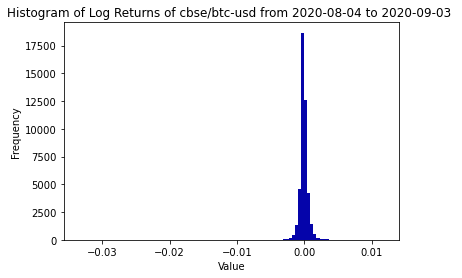

In [3]:
log_returns = np.log(open_prices / open_prices.shift(1)).dropna()
n, bins, patches = plt.hist(x=log_returns, bins=100, color='#0504aa')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Log Returns of cbse/btc-usd from 2020-08-04 to 2020-09-03 ')

In [4]:
mean = log_returns.mean()
std = log_returns.std()
var = log_returns.var()
minimum = log_returns.min()
maximum = log_returns.max()
skew = stats.skew(log_returns)
excess_kurtosis = stats.kurtosis(log_returns)

summary_statistics = pd.DataFrame({'mean': mean,
                                   'stdev': std,
                                   'variance': var,
                                   'min': minimum,
                                   'max': maximum,
                                   'skew': skew,
                                   'excess_kurt': excess_kurtosis
                                  } , index=["cbse/btc-usd"] )

summary_statistics

,mean,stdev,variance,min,max,skew,excess_kurt
cbse/btc-usd,-0.000002,0.000684,4.682728e-07,-0.033437,0.011758,-4.261246,179.515447


In [5]:
stats.jarque_bera(log_returns)

(59932425.44234881, 0.0)

From the histogram and the summary statistics, it is evident that btc-usd is leptokurtic. The Jarque Bera test further comfirms this, implying that log returns does not follow a normal distribution.

## Volatility Clustering

Financial Time series often exhibit volatility clustering which refers to the observation that volatility changes over time and its degree shows a tendency to persist, creating periods of high volatility interspersed with periods of relative clam. This is also known as autoregressive conditional heteroskedasticity.

As seen in the autocorrelation function and partial autocorrelation function graphs below, log returns seems to randomly fluctuate around 0, implying that there is little autocorrelation. 

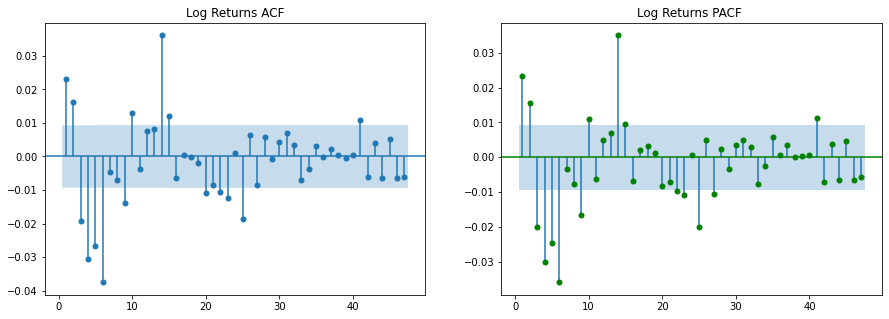

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
_  = plot_acf(log_returns, ax = ax1, title='Log Returns ACF', zero=False)
_  = plot_pacf(log_returns, ax = ax2, title='Log Returns PACF ', color='green', zero=False)

On the other hand, squared log returns display a positive, significant and slowly decaying autocorrelation and partial autocorrelation function for lags up to 18-20 minutes.

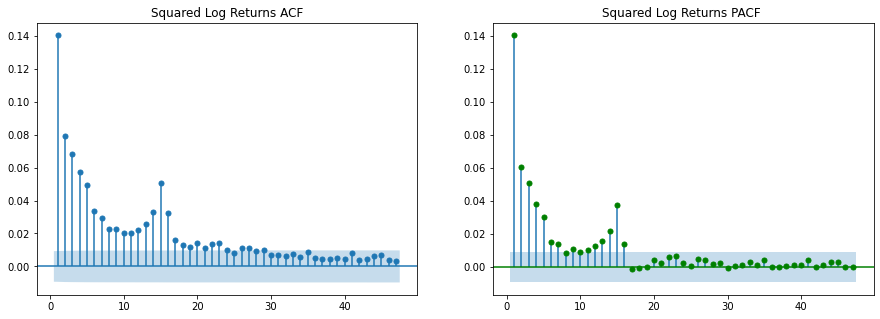

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
_  = plot_acf(log_returns**2, ax = ax1, title='Squared Log Returns ACF', zero=False)
_  = plot_pacf(log_returns**2, ax = ax2, title='Squared Log Returns PACF ', color='green', zero=False)

## Stationarity

The Augmented Dickey-Fuller unit-root test is implemented to check for stationarity in log returns and the results show that the null hypothesis of unit root is rejected. Therefore, the log returns are stationary.

In [8]:
adfuller(log_returns, maxlag=0)[1]

0.0

## Insights about dataset

These observations (non-normality of log returns, highly correlated squared log returns and starionarity) prevent us from employing simple random walk models. Hence we chose to employ ARMA-GARCH to model and forecast volatility in cryptocurrency prices to more accurately describe this phenomenon of volatility clustering and extreme positive kurtosis. 

# Time Series Processes

## ARMA

The conditional mean specifies the behaviour of the returns. In this case, we assume that the return series follows an autoregressive moving average (ARMA) model, which accounts for the possibility of autocorrelation and dependence on past error terms. An ARMA(1, 1) process can be written as

\begin{equation}
    r_t = c + \phi r_{t-1} + \theta \varepsilon_{t-1} + \varepsilon_t,
\end{equation}

where $r_t$ is the *log return* at time $t$, $c$ is a constant term, $-1 < \phi < 1$ is an autoregressive coefficient, $-1 < \theta < 1$ is a moving average coefficient, and $\varepsilon_t$ is the *innovation* or *shock* at time $t$.

## GARCH

Autoregressive conditional heteroskedasticity (ARCH) describes the variance of the current error term or *innovation* as a function of the actual sizes of the previous time periods' error terms. Generalised ARCH (GARCH) extends this by also accounting for past variance. A GARCH(1, 1) process can be written as

\begin{equation}
    \sigma_t^2 = \omega + \alpha \varepsilon_{t-1}^2 + \beta \sigma_{t-1}^2,
\end{equation}

where $\sigma_t^2$ is the *conditional* variance at time $t$, $\omega$ is a constant term, $\alpha$ is an error parameter, and $\beta$ is an autoregressive coefficient. In other words, $\alpha$ measures the *reaction* of the conditional variance to market shocks, while $\beta$ measures its *persistence*. The parameters are constrained by,

\begin{equation}
    \alpha + \beta \leq 1,
\end{equation}

where the sum determines the rate of convergence of the conditional volatility the long-term average level.

## Maximum Likelihood Estimation of ARMA-GARCH

Based on some preliminary research, many sources suggest estimating the ARMA process first, followed by modelling the innovations with GARCH. However, this will most likely lead to inconsistent parameter estimates. In fitting an ARMA model, there is an assumption made about the conditional variance - it is constant. This is clearly not the case when the process is assumed to follow that of GARCH. This is especially an issue when it comes to order determination for the ARMA model - the ACF and PACF confidence bounds will be invalid given the GARCH-type residuals.

Therefore, parameter determination via MLE must be performed for both ARMA and GARCH simultaneously. This simply involves substituting the conditional mean component from ARMA and the conditional variance component from GARCH into the log-likelihood function.

Assuming a normal distribution, the log-likelihood function for estimating the parameters of an ARMA-GARCH process is

\begin{equation}
    \log \left( L(\varepsilon, \sigma_t) \right) = -\frac{1}{2} \sum_{t=1}^T \left( \log \sigma_t^2 + \left( \frac{\varepsilon_t}{\sigma_t} \right) \right)
\end{equation}

However, owing to the excess kurtosis observed in the log returns of BTC, a Student's t-distribution might better describe the "fatter" tails observed. The density function can be written as

\begin{equation}
    f(\varepsilon, \sigma_t^2, \nu) = \frac{\Gamma\left(\frac{\nu + 1}{2}\right)}{\Gamma \left( \frac{\nu}{2} \right)} \left( 1 + \frac{\varepsilon_t^2}{(\nu - 2) \sigma_t^2} \right)^{-\frac{\nu+1}{2}},
\end{equation}

where $\nu > 2$. The gamma function is defined as $\Gamma = \int_0^\infty t^{z-1} e^{-t} dt$.

# Fitting the Model

## Code Implementation

The log likelihood function is defined in volatilitymodel.py. Scipy's Sequential Least Squares Programming (SLSQP) minimization function is used, due to the presence of constraints that we have for our ARMA-GARCH parameters. Initialising our VolatilityModel class allows us to fit the model via MLE and make a one-step prediction (i.e. conditional variance in the next minute).

In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv('data_spot/OHLCVs.csv', index_col=0, parse_dates=True)
df = df[df['instrument'] == 'cbse/btc-usd'].sort_index()  # for Coinbase, BTC/USD

# Compute the log returns using 'open' price
log_returns = np.log(df['open'] / df['open'].shift(1)).dropna()  # we lose the first row
log_returns

2020-08-04 00:01:00    0.000207
2020-08-04 00:02:00    0.001109
2020-08-04 00:03:00    0.001359
2020-08-04 00:04:00   -0.000228
2020-08-04 00:05:00    0.000580
                         ...   
2020-09-03 23:55:00    0.002207
2020-09-03 23:56:00   -0.005903
2020-09-03 23:57:00    0.001400
2020-09-03 23:58:00   -0.002474
2020-09-03 23:59:00   -0.001233
Name: open, Length: 44534, dtype: float64

In [10]:
from volatilitymodel import VolatilityModel

# Take the first two hours as an example
train = log_returns[:120].values

# Instantiate our model
volmodel = VolatilityModel(train)

# Fit the model
volmodel.fit()

C:\Users\howar\Desktop\Volatility AI HACK\volatilitymodel.py:158: RuntimeWarning: invalid value encountered in log
  llh = - 0.5 * (np.log(2 * np.pi) + np.log(sigma2) + eps ** 2 / sigma2)


In [11]:
# Now that we have fit the parameters, we can do a one step prediction:
volmodel.predict(train)

4.4270419735030555e-07

In [12]:
# We can also fit for a Student's t-distribution
volmodel = VolatilityModel(train)
volmodel.fit(t_dist=True)
volmodel.predict(train)

C:\Users\howar\Desktop\Volatility AI HACK\volatilitymodel.py:139: RuntimeWarning: divide by zero encountered in double_scalars
  sigma2[0] = omega / (1 - alpha - beta)


4.446280326843951e-07

## Statistical Significance

To assess the signifiance of the estimated coefficients, we use Student's t-test. To do this, we must compute the t-statistic. Let $\hat{\beta}$ be an estimator of some parameter $\beta$. The t-statistic is defined as

\begin{equation}
    t_{\hat{\beta}} = \frac{\hat{\beta} - \beta_0}{s.e.\left(\hat{\beta}\right)},
\end{equation}

with the null hypothesis and alternative hypothesis being

\begin{equation}
H_0:\beta_0 = 0, \quad H_a : \beta_0 \neq 0.
\end{equation}

Along with the assumption of asymptotic normality made when we used log likelihood function, we say that the quantity $\text{s.e.}\left(\hat{\beta}\right)$ estimates the asymptotic variance of this estimator. We compute the asymptotic variance using the sandwich estimator,

\begin{equation}
    \hat{J}(\hat{\theta})^{-1} \hat{V}(\hat{\theta}) \hat{J}(\hat{\theta})^{-1}
\end{equation}

In [13]:
from volatilitymodel import VolatilityModel

# Take the first hour as an example
train = log_returns[:120].values

# Instantiate our model
volmodel = VolatilityModel(train)

# Fit the model
volmodel.fit()

In [14]:
volmodel.results

(array([ 6.60798669e-03, -4.86832256e-01,  7.49882763e-01,  2.42703888e-04,
         4.67495394e-02,  8.99076034e-01]),
 -157.65410254604703,
 24,
 0,
 'Optimization terminated successfully.')

In [15]:
volmodel.print_summary_stats()

Parameter   Estimate       Std. Err.      T-stat     p-value
c           0.006608        0.000375     17.63444     0.00000
phi         -0.486832        0.140228     3.47173     0.00072
theta       0.749883        0.102148     7.34116     0.00000
omega       0.000243        0.000115     2.11355     0.03664
alpha       0.046750        0.009373     4.98770     0.00000


At a significance level 0.05, we can say that all of the coefficients are statistically significant, i.e. we reject the null hypothesis that the parameters are zero.

## Forecasting Accuracy

Checking the accuracy of the model is not possible directly. Our ARMA-GARCH model makes a one-step-prediction of the conditional variance in the *next minute*. There is no straightforward way to measure a sample or *realized* volatility of the log returns in an instant. Therefore, we propose the following forecasting scheme:

1. Reduce the resolution of the data to 5-minute intervals. Log returns are additive, so we can simply sum the log returns from $t_n$ to $t_{n+5}$.

2. Compute the realized volatility for each 5-minute period.

3. Use a rolling window of 120 samples to fit VolatilityModel.

4. Compute the mean squared error of forecasted volatility vs. realized volatility.

In [16]:
df = pd.read_csv('data_spot/OHLCVs.csv', index_col=0, parse_dates=True)
df = df[df['instrument'] == 'cbse/btc-usd'].sort_index()  # for Coinbase, BTC/USD

# Compute the log returns using 'open' price
log_returns = np.log(df['open'] / df['open'].shift(1)).dropna()  # we lose the first row
log_returns

2020-08-04 00:01:00    0.000207
2020-08-04 00:02:00    0.001109
2020-08-04 00:03:00    0.001359
2020-08-04 00:04:00   -0.000228
2020-08-04 00:05:00    0.000580
                         ...   
2020-09-03 23:55:00    0.002207
2020-09-03 23:56:00   -0.005903
2020-09-03 23:57:00    0.001400
2020-09-03 23:58:00   -0.002474
2020-09-03 23:59:00   -0.001233
Name: open, Length: 44534, dtype: float64

In [17]:
# Resample to five mins and compute the log_return, and the volatility

log_returns_5m = log_returns.resample('5min').sum()
realized_vol_5m = log_returns.resample('5min').std()

start_idx = 0
end_idx = 120

forecasted_vol_5m = []

while end_idx < len(log_returns_5m):
    
    train = log_returns.iloc[start_idx:end_idx].values
    
    # Instantiate our model
    volmodel = VolatilityModel(train)

    # Fit the model
    volmodel.fit(train)
    
    # Predict volatility
    forecasted_vol_5m.append(volmodel.predict(train)**0.5)  # take square root as this is variance
    
    # Move window forward
    start_idx += 1
    end_idx += 1
    
forecasted_vol_5m = np.array(forecasted_vol_5m)

In [18]:
vol_estimates = realized_vol_5m[120:].to_frame()
vol_estimates.columns = ['realized_vol_5m']
vol_estimates['forecasted_vol_5m'] = forecasted_vol_5m
vol_estimates

,realized_vol_5m,forecasted_vol_5m
2020-08-04 10:00:00,0.000678,0.000665
2020-08-04 10:05:00,0.000187,0.000688
2020-08-04 10:10:00,0.000362,0.000694
2020-08-04 10:15:00,0.000229,0.000686
2020-08-04 10:20:00,0.001626,0.000668
...,...,...
2020-09-03 23:35:00,0.003286,0.000360
2020-09-03 23:40:00,0.005412,0.000342
2020-09-03 23:45:00,0.002810,0.000343
2020-09-03 23:50:00,0.001284,0.000398


In [39]:
MSE = np.sum((vol_estimates['realized_vol_5m'] - vol_estimates['forecasted_vol_5m'])**2) / len(vol_estimates)

In [40]:
print('Mean Square Error:', MSE)

Mean Square Error: 3.472671693059485e-07


<AxesSubplot:title={'center':'Realized Volatility and Forecasted Volatility (5 min)'}>

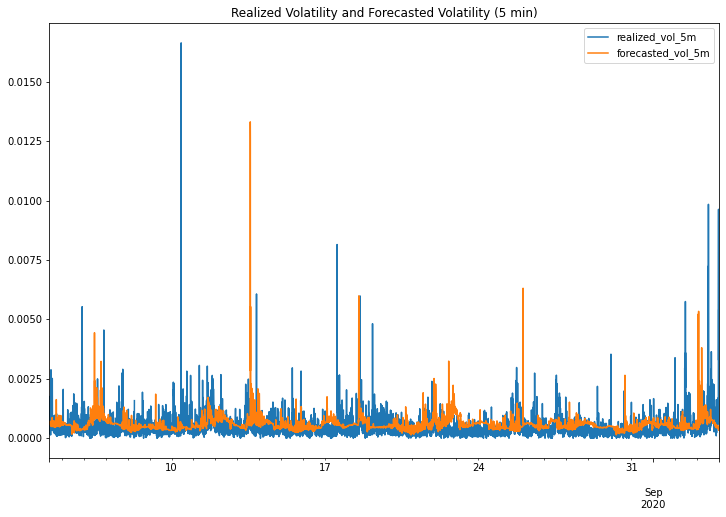

In [21]:
vol_estimates.plot(figsize=(12, 8), title='Realized Volatility and Forecasted Volatility (5 min)')

# Reddit Sentiment

The question is now if we can do better. External regressors can be added in the variance specification, i.e.

\begin{equation}
    \sigma_t^2 = \omega + \alpha \varepsilon_{t-1}^2 + \beta \sigma_{t-1}^2 + \gamma x_{t-1},
\end{equation}

where $\gamma$ is a new parameter and $x_{t-1}$ is an additional feature. We propose two additional regressors:

1. Reddit frequency - how many times BTC has been mentioned on Reddit in the past hours?
2. Sentiment score - what is the overall sentiment of these mentions?

Natural Language Processing (NLP) techniques have been utilised in the past to detect sentiment as *positive* or *negative*. However, comments about the financial markets are unique in terms of terminology. Therefore, a *domain-specific* dataset has to be built to train a sentiment model.

Conveniently, Stocktwits is a site where users can label their own comments as either "bullish" or "bearish", so this would be the perfect source for training data. In our past work, we utilised Selenium and Beautifulsoup to scrape over 4000 posts from stock twits:

In [22]:
# Library imports
from selenium import webdriver
from datetime import datetime, timedelta
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import pytz
from pytz import timezone
import time
import os
import re
    
def get_stocktwits(ticker: str, date: str):

    driver = webdriver.Chrome()
    url = 'https://stocktwits.com/symbol/{}'.format(str(ticker))
    driver.get(url)
    time.sleep(5)
    driver.implicitly_wait(30)
    # Scroll until the date is found
    find_date = pd.to_datetime(date)
    looking_for_element = True

    while looking_for_element:
        for i in range(0, 500):
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(0.2)

        soup = BeautifulSoup(driver.page_source, 'lxml')
        each_post = soup.find_all('div', class_="st_29E11sZ st_jGV698i st_1GuPg4J st_qEtgVMo st_2uhTU4W")
        t = each_post[-1].find('a',
                               class_="st_28bQfzV st_1E79qOs st_3TuKxmZ st_3Y6ESwY st_GnnuqFp st_1VMMH6S").get_text()

        if pd.to_datetime(t[:-10]) < find_date:
            looking_for_element = False
        else:
            print("Current date:", pd.to_datetime(t[:-10]))
            print("Scrolling down")
            time.sleep(2)
            body = driver.find_element_by_css_selector('body')
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    dates = []
    post = []
    tag = []
    est = pytz.timezone('US/Eastern')

    for i in each_post:
        k = i.find('a', class_="st_28bQfzV st_1E79qOs st_3TuKxmZ st_3Y6ESwY st_GnnuqFp st_1VMMH6S").get_text()
        if (len(k) > 3) and (len(k) <= 8):
            k = pd.to_datetime(datetime.today().strftime('%Y-%m-%d')).replace(hour=pd.to_datetime(k).hour,
                                                                              minute=pd.to_datetime(
                                                                                  k).minute).tz_localize(est)
        elif len(k) <= 3:
            try:
                k = pd.to_datetime(datetime.now(timezone('Singapore'))).tz_convert(est) - timedelta(minutes=int(k[:-1]))
            except:
                k = pd.to_datetime(datetime.now(timezone('Singapore'))).tz_convert(est)
        else:
            k = pd.to_datetime(k).tz_localize(est)
        dates += [k]

        post += [i.find('div', class_="st_3SL2gug").get_text()]

        try:
            tag_info = i.find('div', class_="lib_XwnOHoV lib_3UzYkI9 lib_lPsmyQd lib_2TK8fEo").get_text()
        except:
            tag_info = np.nan

        tag += [tag_info]

    df = pd.DataFrame({'Timestamp': dates, 'Text': post, 'Tag': tag}).set_index('Timestamp').sort_index(ascending=False)
    print('Found', len(df), 'stocktwits about', ticker)
    driver.close()
    return df

Instead of using BERT, which is capable of next-sentence predictions (NSP), we used the RoBERTa model. This was proposed in "A Robustly Optimized BERT Pretraining Approach" by Yinhan Liu, Myle Ott, Naman Goyal, Jingfei Du, Mandar Joshi, Danqi Chen, Omer Levy, Mike Lewis, Luke Zettlemoyer, Veselin Stoyanov. It is based on Google’s BERT model released in 2018. It builds on BERT and modifies key hyperparameters, removing the next-sentence pretraining objective and training with much larger mini-batches and learning rates.

We have trained this model on the Stocktwits dataset that we scraped (available in `./sentiment_model`). The model detects "Bullish" or "Bearish" sentiments. What remains is to scrape comments from Reddit concering "BTC" within the time-period of interest. We used Reddit's official API to scrape comments relating to "BTC" or "Bitcoin" from a number of related subreddits. The code implementation for this is available in `sentimentmodel.py`.

## Labelling Market Sentiment

In [ ]:
from sentimentmodel import RobertaModel

reddit_comments = pd.read_csv('reddit_comments.csv', index_col=0, parse_dates=True).dropna()

# Load our previously trained market sentiment model
model = RobertaModel('sentiment_model')

sentiment = []

for idx in range(len(reddit_comments)):
    sentiment.append(model.predict(reddit_comments.iloc[idx].Body, 0))
    
reddit_comments['sentiment'] = sentiment

We previously ran this and generated the following. Let's see how we did by taking a random sample of Reddit comments:

In [23]:
reddit_sentiment = pd.read_csv('reddit_comments_sentiment.csv', index_col=0, parse_dates=True)
reddit_sentiment.sample(n=10)

,Body,Subreddit,sentiment
Timestamp,,,
2020-08-23 09:14:47+00:00,I love Monero but it has a few things going ag...,CryptoCurrency,Bearish
2020-08-09 14:44:24+00:00,"He's long, and just getting longer apparently.",CryptoCurrency,Bullish
2020-08-17 16:35:51+00:00,This is good to known. My binance account was ...,CryptoCurrency,Bullish
2020-08-27 01:09:14+00:00,fees + spread,CryptoCurrency,Bullish
2020-08-20 11:31:29+00:00,This makes it seem like the M2 money supply is...,CryptoCurrency,Bearish
2020-08-20 01:40:38+00:00,"You dlnt carry, just memorize your provate key.",CryptoCurrency,Bearish
2020-08-07 07:40:40+00:00,the scale of the scam was to much for you to h...,CryptoCurrency,Bearish
2020-08-04 19:35:12+00:00,So enjoy yur profits.. And get back in,CryptoCurrency,Bullish
2020-08-18 03:10:17+00:00,Maybe... or maybe not.\n\nI think it’s going t...,CryptoCurrency,Bearish


## Creating Features

We propose the following. To measure Reddit activity, we simply sum of the number of comments, $N$, that have been made about BTC in the past hour. The *net sentiment score* can be computed by defining $S_{Bullish} = 1$, and $S_{Bearish} = -1$, and summing up these scores for comments in the past hour to give $S$.

The new GARCH specification is now

\begin{equation}
    \sigma_t^2 = \omega + \alpha \varepsilon_{t-1}^2 + \beta \sigma_{t-1}^2 + \gamma N_{t-1} + \delta S_{t-1},
\end{equation}

where $\gamma$ and $\delta$ are new parameters to be estimated.

We implement a one-hour rolling window and compute $N$ and $S$:

In [24]:
from datetime import timedelta
from datetime import datetime as dt

reddit_sentiment['sentiment'] = reddit_sentiment['sentiment'].replace({'Bullish': 1, 'Bearish': -1})

minute_increment = timedelta(minutes=1)
hour_increment = timedelta(hours=1)

start = dt(2020, 8, 3, 0, 0)
end = start + hour_increment
final_end = dt(2020, 9, 4, 23, 59)

timestamp_log = []
count_log = []
sentiment_log = []

while end <= final_end:
    
    comments_in_period = reddit_sentiment[(reddit_sentiment.index.tz_localize(None) >= start) & (reddit_sentiment.index.tz_localize(None) <= end)]
    number_of_comments = len(comments_in_period)
    sentiment_score = comments_in_period['sentiment'].sum()
    
    # Append to lists
    timestamp_log.append(end)
    count_log.append(number_of_comments)
    sentiment_log.append(sentiment_score)
    
    start = start + minute_increment
    end = end + minute_increment
    
sentiment_features = pd.DataFrame(count_log, index=timestamp_log)
sentiment_features.columns = ['comments_past_hour']
sentiment_features['net_sentiment'] = sentiment_log
sentiment_features

,comments_past_hour,net_sentiment
2020-08-03 01:00:00,3,1
2020-08-03 01:01:00,3,1
2020-08-03 01:02:00,3,1
2020-08-03 01:03:00,3,1
2020-08-03 01:04:00,3,1
...,...,...
2020-09-04 23:55:00,2,2
2020-09-04 23:56:00,2,2
2020-09-04 23:57:00,2,2
2020-09-04 23:58:00,2,2


<AxesSubplot:title={'center':'Reddit Mentions of BitCoin from 2020-08-03 to 2020-09-04'}, xlabel='Time', ylabel='Comments per Hour'>

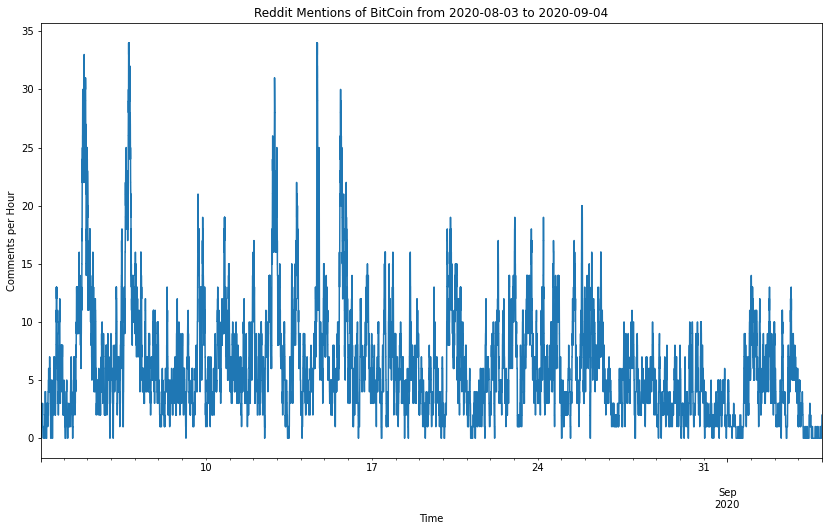

In [25]:
sentiment_features['comments_past_hour'].plot(figsize=(14, 8), ylabel='Comments per Hour', xlabel='Time', title='Reddit Mentions of BitCoin from 2020-08-03 to 2020-09-04')

<AxesSubplot:title={'center':'Sentiment of BitCoin from 2020-08-03 to 2020-09-04'}, xlabel='Time', ylabel='Net sentiment score in past hour'>

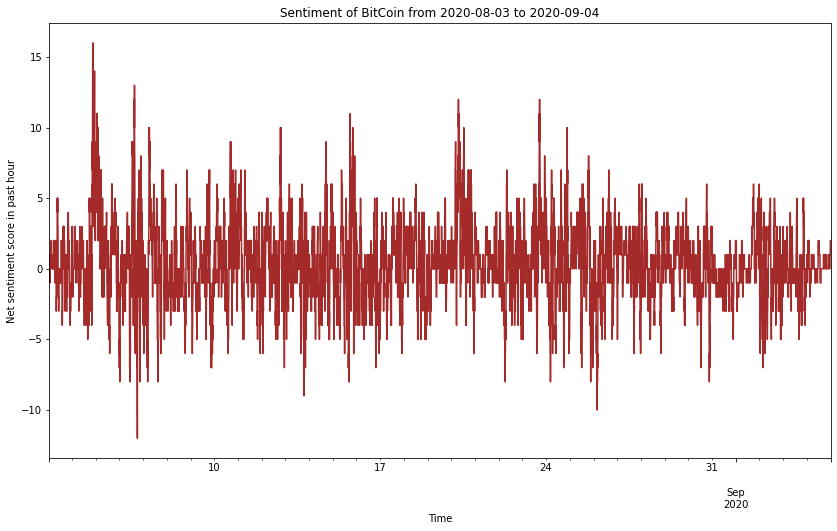

In [26]:
sentiment_features['net_sentiment'].plot(figsize=(14, 8), ylabel='Net sentiment score in past hour', xlabel='Time', title='Sentiment of BitCoin from 2020-08-03 to 2020-09-04', color='brown')

## Fitting ARMA GARCH with Sentiment External Regressors

In [27]:
df = pd.read_csv('data_spot/OHLCVs.csv', index_col=0, parse_dates=True)
df = df[df['instrument'] == 'cbse/btc-usd'].sort_index()  # for Coinbase, BTC/USD

# Compute the log returns using 'open' price
log_returns = np.log(df['open'] / df['open'].shift(1)).dropna()  # we lose the first row
log_returns_5m = log_returns.resample('5min').sum()
realized_vol_5m = log_returns.resample('5min').std()

features = pd.concat([log_returns_5m, realized_vol_5m, sentiment_features], axis=1).dropna()
features.columns = ['log_returns_5m', 'realized_vol_5m', 'N', 'S']

Due to time constriants, we limit our backtest to just nine intervals, using the same rolling window scheme as before.

In [46]:
from volatilitysentimentmodel import VolatilitySentimentModel

start_idx = 0
end_idx = 120

forecasted_vol_5m = []

while end_idx < 129:
    
    train_returns = features.iloc[start_idx:end_idx]['log_returns_5m']
    train_N = features.iloc[start_idx:end_idx]['N']
    train_S = features.iloc[start_idx:end_idx]['S']
    
    # Instantiate our model
    volmodel = VolatilitySentimentModel(train_returns, train_N, train_S)

    # Fit the model
    volmodel.fit()
    
    
    # Predict volatility
    forecasted_vol_5m.append(volmodel.predict(train_returns, train_N, train_S)**0.5)  # take square root as this is variance
    
    # Move window forward
    start_idx += 1
    end_idx += 1
    
forecasted_vol_5m = np.array(forecasted_vol_5m)

C:\Users\howar\Desktop\Volatility AI HACK\volatilitysentimentmodel.py:115: RuntimeWarning: divide by zero encountered in double_scalars
  sigma2[0] = omega / (1 - alpha - beta)
C:\Users\howar\Desktop\Volatility AI HACK\volatilitysentimentmodel.py:136: RuntimeWarning: invalid value encountered in log
  llh = - 0.5 * (np.log(2 * np.pi) + np.log(sigma2) + eps ** 2 / sigma2)


In [47]:
forecasted_vol_5m

array([0.02665824, 0.04561356, 0.06601318, 0.1428043 , 0.03873225,
       0.02779109, 0.00109589, 0.05897812, 0.00105772])

In [48]:
MSE = np.sum((forecasted_vol_5m - features['realized_vol_5m'][120:129].values)**2) / 50
print('Mean Square Error:', MSE)

Mean Square Error: 0.0006578589690882937


In [52]:
# Let's also get the summary statistics one of the fits:

train_returns = features.iloc[:2]['log_returns_5m']
train_N = features.iloc[:2]['N']
train_S = features.iloc[:2]['S']
    
volmodel = VolatilitySentimentModel(train_returns, train_N, train_S)
volmodel.fit()
volmodel.print_summary_stats()

Parameter   Estimate       Std. Err.      T-stat     p-value
c           0.044647        0.052302     0.85364     0.55016
phi         0.171328        0.045159     3.79386     0.16407
theta       0.198264        0.408490     0.48536     0.71233
omega       0.002912        0.000044     65.72816     0.00968
alpha       0.092775        0.005263     17.62775     0.03608
gamma       0.739892        0.003007     246.03329     0.00259
delta       -0.145234        0.000065     2227.81578     0.00029


C:\Users\howar\Desktop\Volatility AI HACK\volatilitysentimentmodel.py:136: RuntimeWarning: invalid value encountered in log
  llh = - 0.5 * (np.log(2 * np.pi) + np.log(sigma2) + eps ** 2 / sigma2)
C:\Users\howar\Desktop\Volatility AI HACK\volatilitysentimentmodel.py:115: RuntimeWarning: divide by zero encountered in double_scalars
  sigma2[0] = omega / (1 - alpha - beta)


# Conclusion

There has been a general increase in the level of retail trading, especially due to the global lockdowns that occured due to the pandemic. Our hypothesis was that *social media sentiment* can enhance traditional analytical techniques to create more accurate predictions of volatility. This was seen to be the case based on the CBSE/BTC-USD data that we have analysed. The regression coefficients of both the *number* of Reddit posts made and their *sentiment* were found to be statistically significant.

It is unclear if the results shown here would be useful in developing a trading strategy. Indeed, deriving alpha from sentiment factors can be challenging, due to the unpredictable dynamics of investor sentiment. However, we have shown that it is much more feasible to incorporate such data into predictive *risk* models. Risk management is an integrable part of any strategy. Indeed, while this model is incapable of predicting the *sign* of the returns, it has shown some efficacy in predicting the *magnitude* of the returns. This could potentially be used in tandem with another alpha-generating strategy, but this is also valuable in *managing risk*.

There are definitely pitfalls in the work that has been shown here. The Roberta sentiment model that we have utilised is not able to capture all of the nuances of Reddit user-language. New terms and memes are coming up all the time, which means that the model would have to be trained on new data consistently in order to keep up. In addition, we had a rather small dataset. There are definitely other sources of data which could have been utilised to capture more information (e.g. news, other social media platforms). The features that we have engineered are also very unsophisticated; a more advanced model which can calculate a continuous sentiment score, rather than just a binary "bullish" or "bearish" label, would definitely be more advantageous.

There are also simple practical issues with implementing such a model. The model forecasts volatility in the next 5-minutes, but does not provide any further information like liquidity risk. Future work could make use of the Limit Order Book data to characterise such risks. Furthermore, other external regressors could have been added to the model. *Derivatives* prices are often a good gauge of the *implied volatility* of a given asset. A metric could be designed to explain the speculation surrounding BTC to improve the predictive power of our ARMA GARCH model.